# Calculate Rainfall Anomaly Index (RAI) with Python

The RAI was developed by van Rooy (1965) and  and adopted by Freitas (2004), which incorporates a ranking procedure to assign magnitudes to positive and negative anomalies, namely it considers two phases, positive precipitation anomalies and negative precipitation anomalies. 

In [1]:
import pandas as pd
import numpy as np
import mapclassify as mc
import matplotlib.pyplot as plt

%matplotlib inline

## Prepare data

data = pd.read_csv('data/monthly.csv',
                   usecols=[ 1, 2, 3],   
                  )

data.index = pd.to_datetime(data.year*10000 + data.month*100+1)
data.head()

Old data

In [2]:
data = pd.read_csv('data/prcphq.046037.month.txt', sep=r"\s+",                    
                   skiprows=1, usecols=[1, 2], 
                   parse_dates=True,
                   index_col = 0,
                   names=['Date', 'Rain'])

## Calculate monthly RAI

In [3]:
data['Rain_6'] = data['Rain'].rolling(6).sum()
df_6mon = data[['Rain_6']].dropna()

In [4]:
df_6mon['RAI'] = np.nan

for imon in np.arange(1, 13):
    sinds = df_6mon.index.month==imon    
    x = df_6mon[sinds] 
    y  = x.copy()
    x1 = x.copy().sort_values(by='Rain_6', ascending=False)
    x_avg  = x1['Rain_6'].mean()    
    mx_avg = x1['Rain_6'].head(10).mean()
    mn_avg = x1['Rain_6'].tail(10).mean()
    anom   = x['Rain_6'] - x_avg

    rai_plus  = 3.0*anom[anom>=0]/(mx_avg-x_avg)
    rai_minus = -3.0*anom[anom<0]/(mn_avg-x_avg)     
    y.loc[anom>=0, 'RAI'] = rai_plus.values
    y.loc[anom<0,  'RAI'] = rai_minus.values
    df_6mon.loc[sinds, 'RAI'] = y['RAI'].values   

In [5]:
data['RAI'] = df_6mon['RAI']
del df_6mon
data.head(7)

,Rain,Rain_6,RAI
Date,,,
1892-01-31,2.5,NaN,NaN
1892-02-29,12.2,NaN,NaN
1892-03-31,1.8,NaN,NaN
1892-04-30,1.5,NaN,NaN
1892-05-31,16.8,NaN,NaN
1892-06-30,1.0,35.8,-2.712326
1892-07-31,11.7,45.0,-2.237990


## Visualize

(-4, 4)

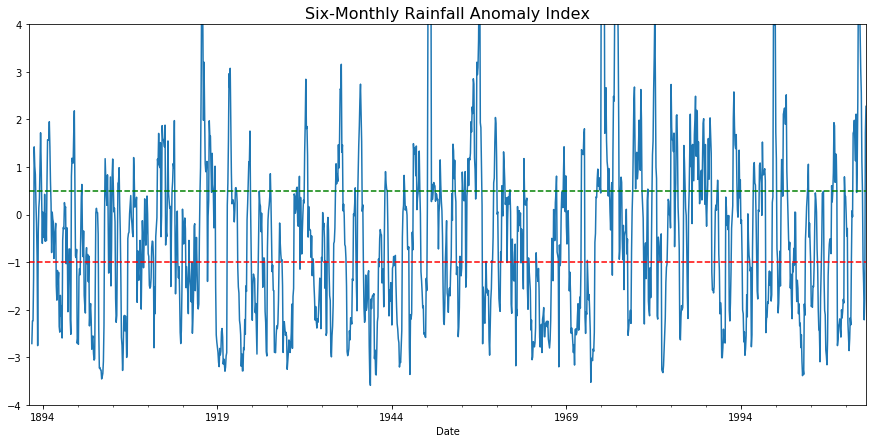

In [6]:
ax = data['RAI'].plot(figsize=(15, 7), )
ax.axhline(0.5,  linestyle='--', color='g')
ax.axhline(-1, linestyle='--', color='r')
ax.set_title('Six-Monthly Rainfall Anomaly Index', fontsize=16)
ax.set_xlim(data.index.min(), data.index.max())
ax.set_ylim(-4, 4)

In [7]:
data[['RAI']].to_csv('RAI_1.csv')

## Summary and discussion

RAI could be applied to addresses droughts that affect agriculture, water resources and other sectors, as RAI is flexible in that it can be analysed at various timescales.

It is quite easy to calculate, with a single input (precipitation) that can be analysed on monthly, seasonal and annual timescales. However, calculating RAI requires a serially complete dataset with estimates of missing values. Variations within the year need to be small compared to temporal variations.

## References

Rooy, M.P.V., 1965. A rainfall anomaly index independent of time and space. Weather Bureau of South Africa 14, 43-48.

Freitas, M.A.S., 2004. A Previsão de Secas e a Gestão Hidroenergética: O Caso da Bacia do Rio Parnaíba no Nordeste do Brasil. Seminário Internacional sobre Represas y Operación de Embalses, Puerto Iguazú. 

Kraus, E.B., 1977: Subtropical droughts and cross-equatorial energy transports. Monthly Weather Review, 105(8): 1009-1018. DOI: 10.1175/1520-0493(1977)105<1009:SDACEE>2.0.CO;2.

van Rooy, M.P., 1965: A Rainfall Anomaly Index independent of time and space. Notos, 14: 43–48.

http://www.droughtmanagement.info/rainfall-anomaly-index-rai/